In [699]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [700]:
import glob
mylist = [f for f in glob.glob("*.xlsx")]

In [701]:
mylist

['Amazon Inc.xlsx',
 'IBM.xlsx',
 'IKEA AB.xlsx',
 'National Bank of Canada.xlsx',
 'Netflix.xlsx',
 'Oracle Corp.xlsx',
 'Sony Corp.xlsx',
 'Target Corp.xlsx',
 'Walmart.xlsx']

In [702]:
tag = mylist[8]
tag

'Walmart.xlsx'

In [703]:
df1 = pd.read_excel(tag,sheet_name='Profit & loss account',header=None)

df2 = pd.read_excel(tag,sheet_name='Balance sheet',header=None)

#df3 = pd.read_excel(tag,sheet_name='Cash flow statement',header=None)

df4 = pd.read_excel(tag,sheet_name='Global ratios',header=None)

In [704]:
df1.replace(to_replace='n.a.', value= np.NaN , inplace=True)
df1.replace(to_replace='n.s.', value= np.NaN , inplace=True)

df2.replace(to_replace='n.a.', value= np.NaN , inplace=True)
df2.replace(to_replace='n.s.', value= np.NaN , inplace=True)

#df3.replace(to_replace='n.a.', value= np.NaN , inplace=True)
#df3.replace(to_replace='n.s.', value= np.zeros , inplace=True)

df4.replace(to_replace='n.a.', value= np.NaN , inplace=True)
df4.replace(to_replace='n.s.', value= np.NaN , inplace=True)


In [705]:
result = pd.DataFrame(index=pd.to_datetime(df1.iloc[4,:].dropna()).dt.year)
result

""
4
2020
2019
2018
2017
2016
2015
2014
2013
2012


In [706]:
a = df2[df2.iloc[:,0] == 'Current assets'].index
b = df2[df2.iloc[:,0] == 'Current liabilities'].index

In [707]:
c =df2.iloc[a,1:].astype(int).values/df2.iloc[b,1:].astype(int).values

result['Working Capital Ratio'] = c.T

In [708]:
d = df4[df4.iloc[:,0] == ' ∟ ROE using Net income (%)'].index
e = df4.iloc[d,1:].astype(float).values

result['ROE (Net Income)'] = e.T

In [709]:
f = df1[df1.iloc[:,0] == ' ∟ EBITDA'].index
g = df1.iloc[f,1:].astype(float).values

result['EBITDA'] = g.T

In [710]:
d = df4[df4.iloc[:,0] == ' ∟ Profit margin (%)'].index
e = df4.iloc[d,1:].values.astype(float)

result['Profit Margin'] = e.T

In [711]:
f = df1[df1.iloc[:,0] == ' ∟ Operating revenue (Turnover)'].index
g = df1.iloc[f,1:].astype(float).values

result['Operating Revenue'] = g.T

In [712]:
result.index.names = ['Year']

In [713]:
result

,Working Capital Ratio,ROE (Net Income),EBITDA,Profit Margin,Operating Revenue
Year,,,,,
2020,0.794524,19.929,31568000.0,3.839,523964000.0
2019,0.798908,9.201,32657000.0,2.228,514405000.0
2018,0.759848,12.665,30966000.0,3.023,500343000.0
2017,0.861956,17.536,32844000.0,4.219,485873000.0
2016,0.932218,18.243,33559000.0,4.488,482130000.0
2015,0.969733,20.103,36320000.0,5.106,485651000.0
2014,0.882327,21.011,35742000.0,5.177,476294000.0
2013,0.834610,22.267,36226000.0,5.476,468651000.0
2012,0.882424,22.014,34621000.0,5.449,446509000.0


In [714]:
x=[0.0]
m=np.float(0)

for i in range(0,len(result.index)-1):
    m = ((result.iloc[i,4] - result.iloc[i+1,4]) /result.iloc[i+1,4]).astype(float)
    x.append(m)

se = pd.Series(x)

result['Revenue Growth Rate'] = se.values

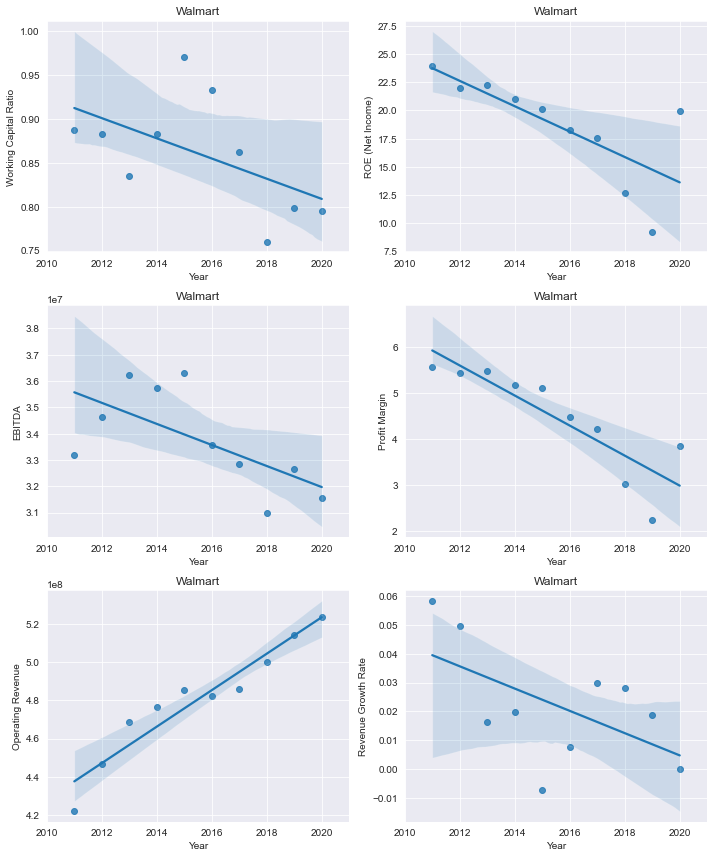

In [715]:
fig = plt.figure(figsize=(10,12))
for index in range(len(result.columns)):
    plt.subplot(3,2,index+1)
    plt.xlim(result.index.min()-1,result.index.max()+1)
    plt.title(tag.split(".")[0])
    sns.regplot(x=result.index, y=result.iloc[:,index], data=result)
fig.tight_layout(pad=1)

In [716]:
fig.savefig('%s .png'%(tag.split(".")[0]))

In [717]:
xl_file=pd.ExcelWriter('%s R.xlsx'%(tag.split(".")[0]))
result.to_excel(xl_file,index=True)
xl_file.save()